#Analisis Bisnis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/SuperStore - data.csv')

In [4]:
data.head(5)

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


#Data Check

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        9994 non-null   object 
 1   Customer_ID     9994 non-null   object 
 2   Postal_Code     9994 non-null   int64  
 3   Product_ID      9994 non-null   object 
 4   Sales           9994 non-null   float64
 5   Quantity        9994 non-null   int64  
 6   Discount        9994 non-null   float64
 7   Profit          9994 non-null   float64
 8   Category        9994 non-null   object 
 9   Sub-Category    9994 non-null   object 
 10  Product_Name    9994 non-null   object 
 11  Order_Date      9994 non-null   object 
 12  Ship_Date       9994 non-null   object 
 13  Ship_Mode       9994 non-null   object 
 14  Customer_Name   9994 non-null   object 
 15  Segment         9994 non-null   object 
 16  Country/Region  9994 non-null   object 
 17  City            9994 non-null   o

In [6]:
data.describe()

,Postal_Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.371023,229.858001,3.789574,0.156203,28.656896
std,32063.704510,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#Data Cleaning

In [7]:
data = data.drop_duplicates()

In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9993, dtype: bool

#Count Null Value

In [9]:
data.isna(). sum()

Order_ID          0
Customer_ID       0
Postal_Code       0
Product_ID        0
Sales             0
Quantity          0
Discount          0
Profit            0
Category          0
Sub-Category      0
Product_Name      0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
Country/Region    0
City              0
State             0
Region            0
dtype: int64

#Analisis Penjualan
 ## Analisis Penjualan Berdasarkan Region, Catgory dan Sub-Category

In [10]:
region_sales = data.groupby('Region')['Sales'].sum().reset_index()
region_sales

,Region,Sales
0,Central,501239.8908
1,East,678499.8680
2,South,391721.9050
3,West,725457.8245


<ipython-input-11-777c22c0af8f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=region_sales, order= region_sales['Region'],palette='viridis')


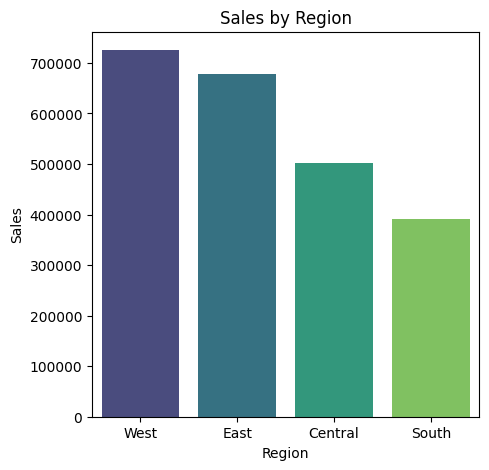

In [11]:
region_sales = region_sales.sort_values(by='Sales', ascending=False)
plt.figure(figsize=(5,5))
sns.barplot(x='Region', y='Sales', data=region_sales, order= region_sales['Region'],palette='viridis')
plt.title('Sales by Region')
plt.show()

Pie Chart

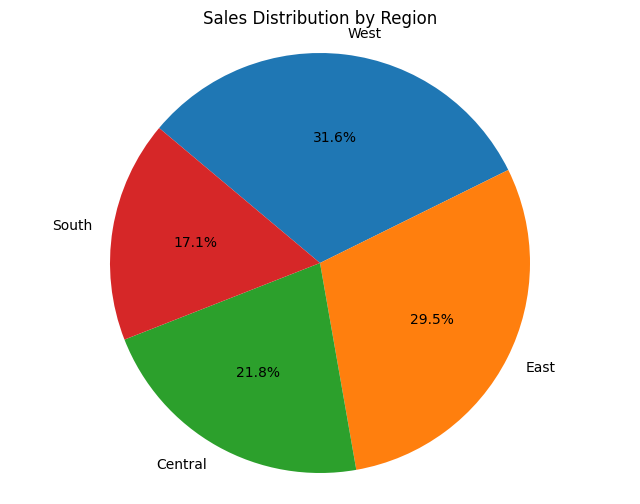

In [12]:
region_sales = region_sales.sort_values(by='Sales', ascending=False)
plt.figure(figsize=(8, 6))
plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=140, counterclock=False)
plt.title('Sales Distribution by Region')
plt.axis('equal')
plt.show()


In [13]:
category_sales = data.groupby('Category')['Sales'].sum().reset_index()

<ipython-input-14-a5878db24726>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=category_sales, order= category_sales['Category'],palette='viridis')


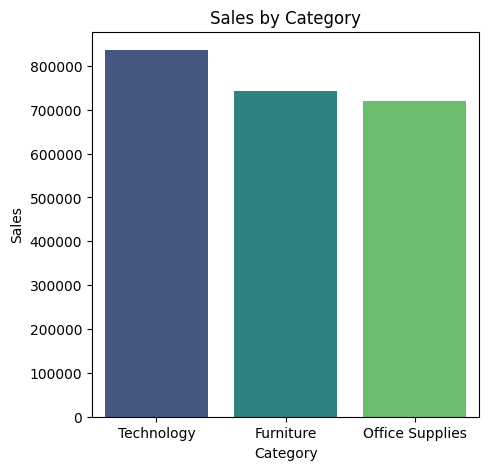

In [14]:
category_sales = category_sales.sort_values(by='Sales', ascending=False)
plt.figure(figsize=(5, 5))
sns.barplot(x='Category', y='Sales', data=category_sales, order= category_sales['Category'],palette='viridis')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [15]:
subcategory_sales = data.groupby ('Sub-Category')['Sales'].sum().reset_index()

<ipython-input-16-7fb66985bce6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Sales', data=subcategory_sales, order=subcategory_sales['Sub-Category'],palette='viridis')


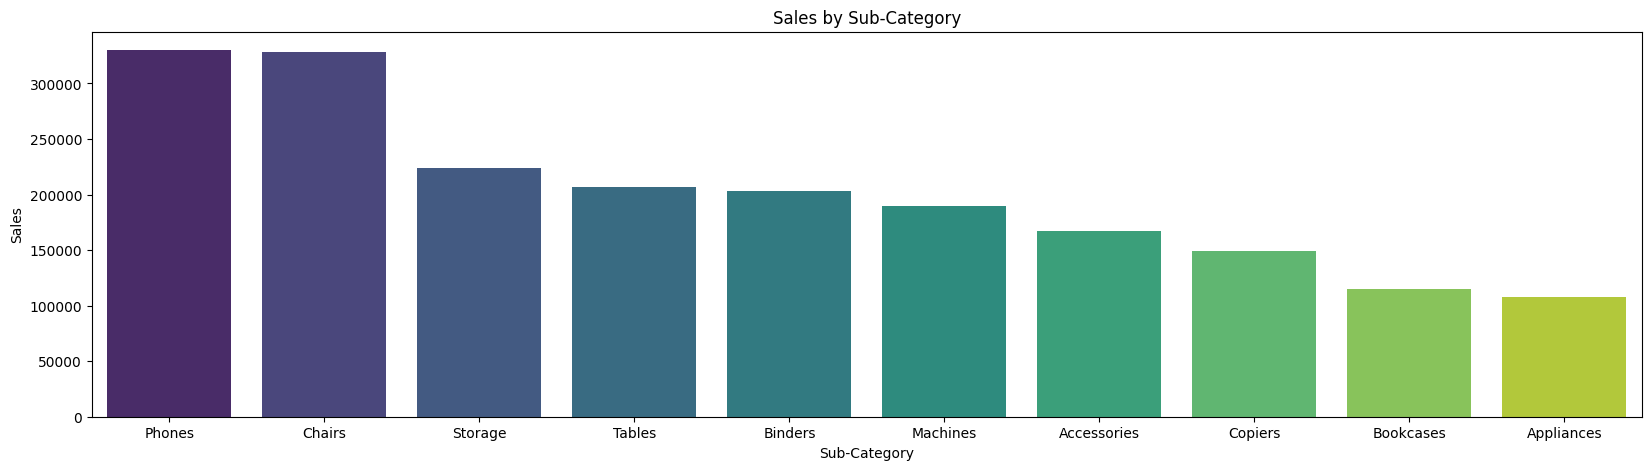

In [16]:
subcategory_sales = subcategory_sales.sort_values(by='Sales', ascending=False)
subcategory_sales = subcategory_sales.head(10)
plt.figure(figsize=(20, 5))
sns.barplot(x='Sub-Category', y='Sales', data=subcategory_sales, order=subcategory_sales['Sub-Category'],palette='viridis')
plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.show()


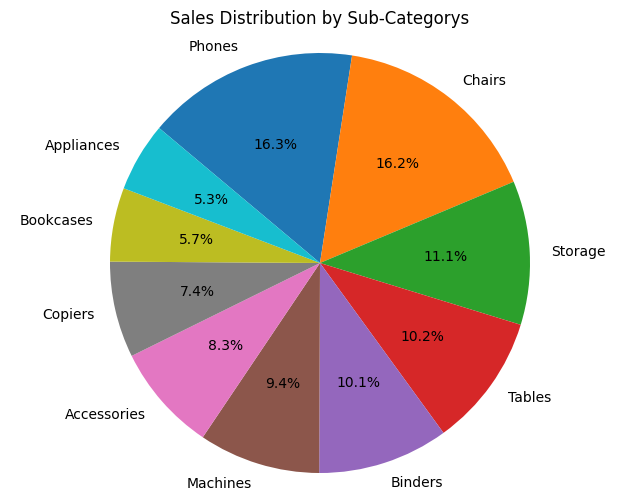

In [17]:
subcategory_sales = subcategory_sales.sort_values(by='Sales', ascending=False)
plt.figure(figsize=(8, 6))
plt.pie(subcategory_sales['Sales'], labels=subcategory_sales['Sub-Category'], autopct='%1.1f%%', startangle=140, counterclock=False)
plt.title('Sales Distribution by Sub-Categorys')
plt.axis('equal')
plt.show()


#Analisis Profit/Keuntungan
## Profit berdasarkan Region, Category dan Sub-Category




In [18]:
region_profit = data.groupby ('Region')['Profit'].sum().reset_index()
category_profit = data.groupby ('Category')['Profit'].sum(). reset_index()
subcategory_profit = data.groupby ('Sub-Category')['Profit'].sum().reset_index()

#Profit By region

<ipython-input-19-0b50415ff0bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data= region_profit, order= region_profit['Region'], palette='plasma')


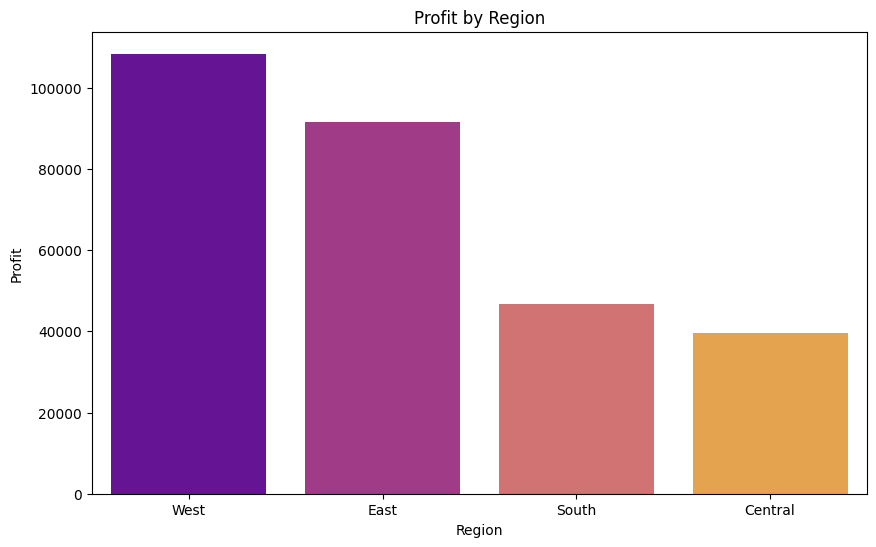

In [19]:
region_profit = region_profit.sort_values(by='Profit', ascending = False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data= region_profit, order= region_profit['Region'], palette='plasma')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

In [20]:
region_profit

,Region,Profit
3,West,108418.4489
1,East,91534.8388
2,South,46749.4303
0,Central,39706.3625


#Profit By Category

<ipython-input-21-3dd609859c69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data= category_profit, order= category_profit['Category'], palette='plasma')


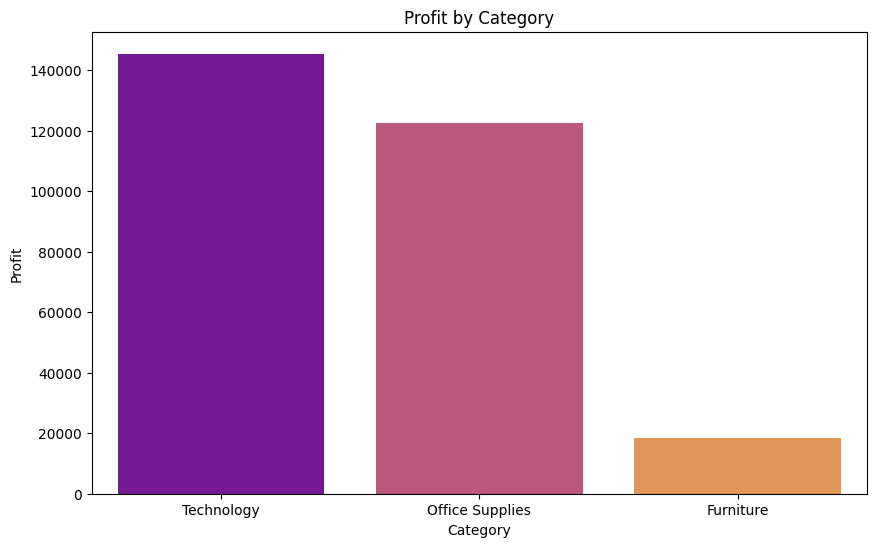

In [21]:
category_profit = category_profit.sort_values(by='Profit', ascending = False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data= category_profit, order= category_profit['Category'], palette='plasma')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

<ipython-input-22-cedbcce4d20f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Category', x='Profit', data= category_profit, order= category_profit['Category'], palette='plasma')


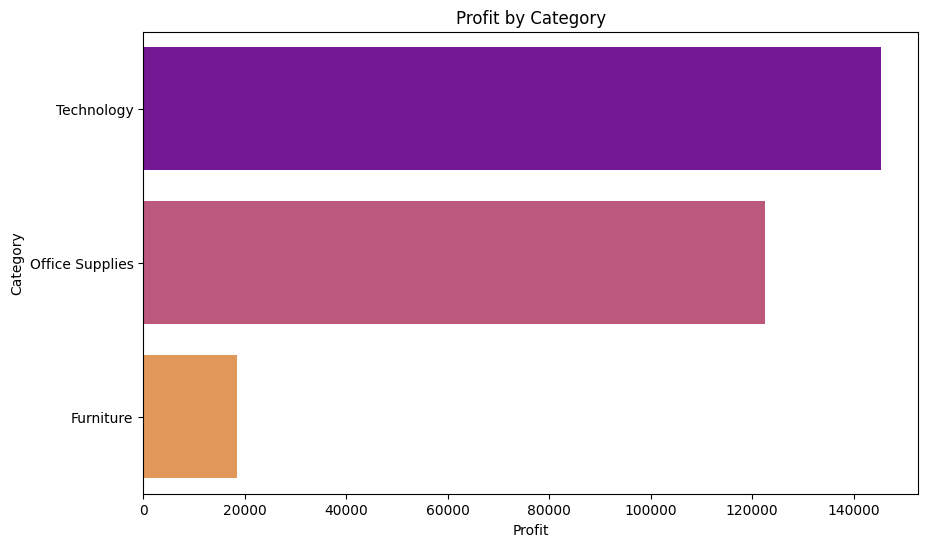

In [22]:
category_profit = category_profit.sort_values(by='Profit', ascending = False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Category', x='Profit', data= category_profit, order= category_profit['Category'], palette='plasma')
plt.title('Profit by Category')
plt.ylabel('Category')  # Changed from xlabel to ylabel
plt.xlabel('Profit')  # Changed from ylabel to xlabel
plt.show()


In [23]:
category_profit

,Category,Profit
2,Technology,145454.9481
1,Office Supplies,122490.8008
0,Furniture,18463.3316


#Profit by Sub-Category

<ipython-input-24-90edad64bf4c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Sub-Category', x='Profit', data= subcategory_profit, order= subcategory_profit['Sub-Category'],palette='viridis')


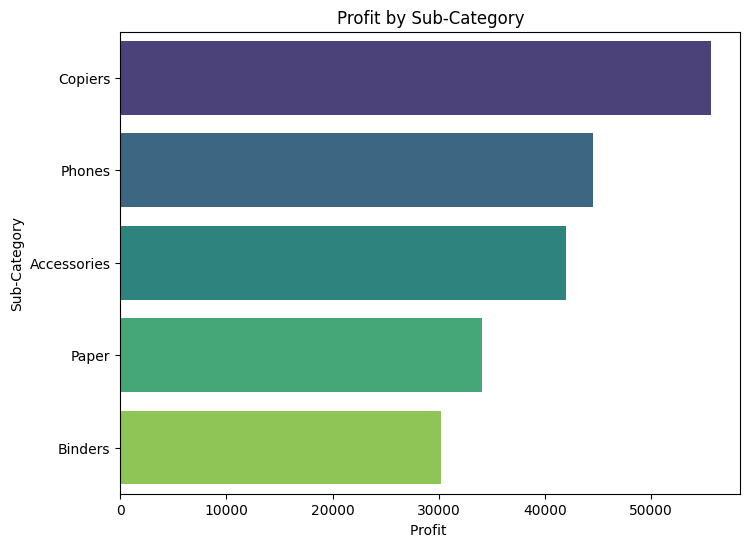

In [24]:
subcategory_profit = subcategory_profit.sort_values(by='Profit', ascending = False)
subcategory_profit = subcategory_profit.head(5)
plt.figure(figsize=(8, 6))
sns.barplot(y='Sub-Category', x='Profit', data= subcategory_profit, order= subcategory_profit['Sub-Category'],palette='viridis')
plt.title('Profit by Sub-Category')
plt.xlabel('Profit ')
plt.ylabel('Sub-Category')
plt.show()

# Customer Segmentation
## Penjualan berdasarkan Segment, Country, States, City

In [27]:
segment_sales  = data.groupby ('Segment')['Profit'].sum().reset_index()
country_sales = data.groupby('Country/Region')['Sales'].sum().reset_index()
states_sales  = data.groupby('State')['Sales'].sum().reset_index()
city_sales    = data.groupby('City')['Sales'].sum().reset_index()

<ipython-input-28-d4ff6adac270>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Segment', data= segment_sales, order=segment_sales['Segment'],palette='plasma')


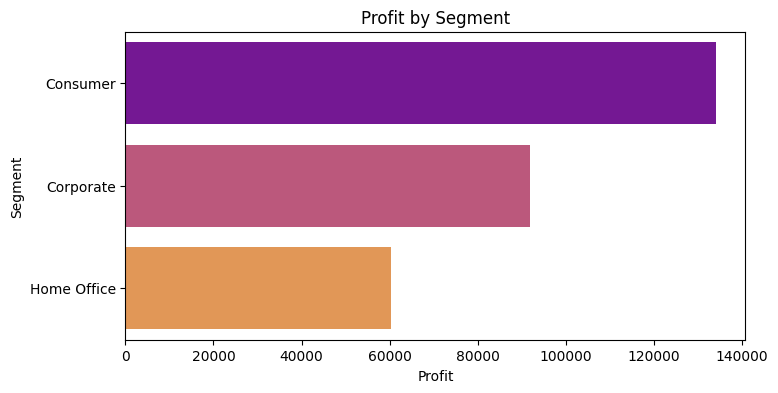

In [28]:
segment_sales = segment_sales.sort_values(by='Profit', ascending = False)
plt.figure(figsize=(8, 4))
sns.barplot(x='Profit', y='Segment', data= segment_sales, order=segment_sales['Segment'],palette='plasma')
plt.title('Profit by Segment')
plt.ylabel('Segment')
plt.xlabel('Profit')
plt.show()

In [29]:
segment_sales

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60310.7373


# Sales By Country


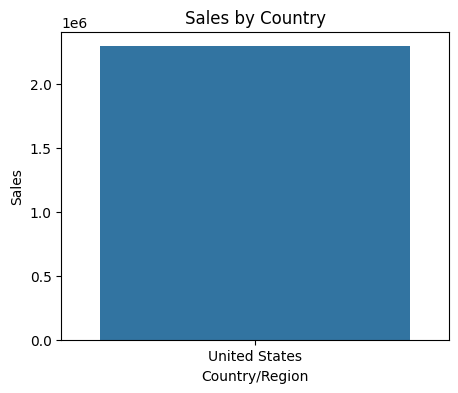

In [31]:
country_sales = country_sales.sort_values(by='Sales', ascending = False)
plt.figure(figsize=(5, 4))
sns.barplot(x='Country/Region', y='Sales', data= country_sales, order= country_sales['Country/Region'])
plt.title('Sales by Country')
plt.xlabel('Country/Region')
plt.ylabel('Sales')
plt.show()

# Sales By State

<ipython-input-32-e893726fed22>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Sales', data= states_sales, order= states_sales['State'],palette='plasma')


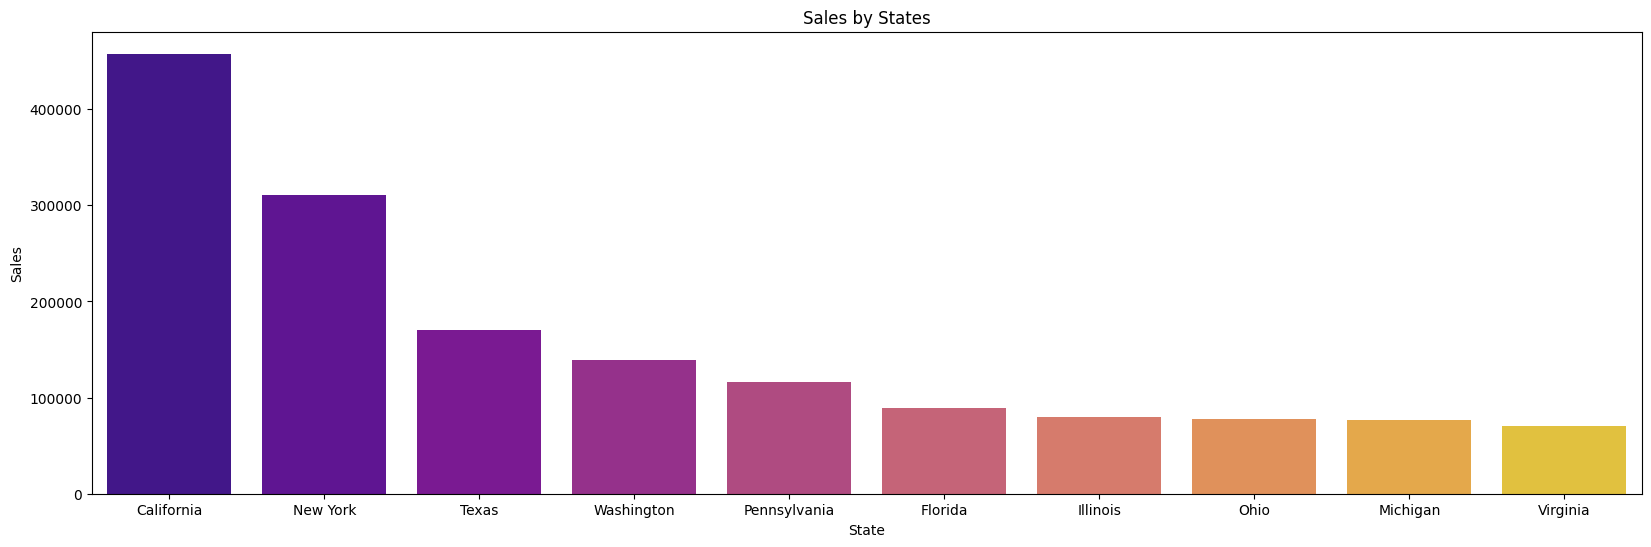

In [32]:
states_sales = states_sales.sort_values(by='Sales', ascending = False)
states_sales = states_sales.head(10)
plt.figure(figsize=(20, 6))
sns.barplot(x='State', y='Sales', data= states_sales, order= states_sales['State'],palette='plasma')
plt.title('Sales by States')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()

#Sales By City

<ipython-input-33-4f959ce29bc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Sales', data= states_sales, order= states_sales['City'],palette='plasma')


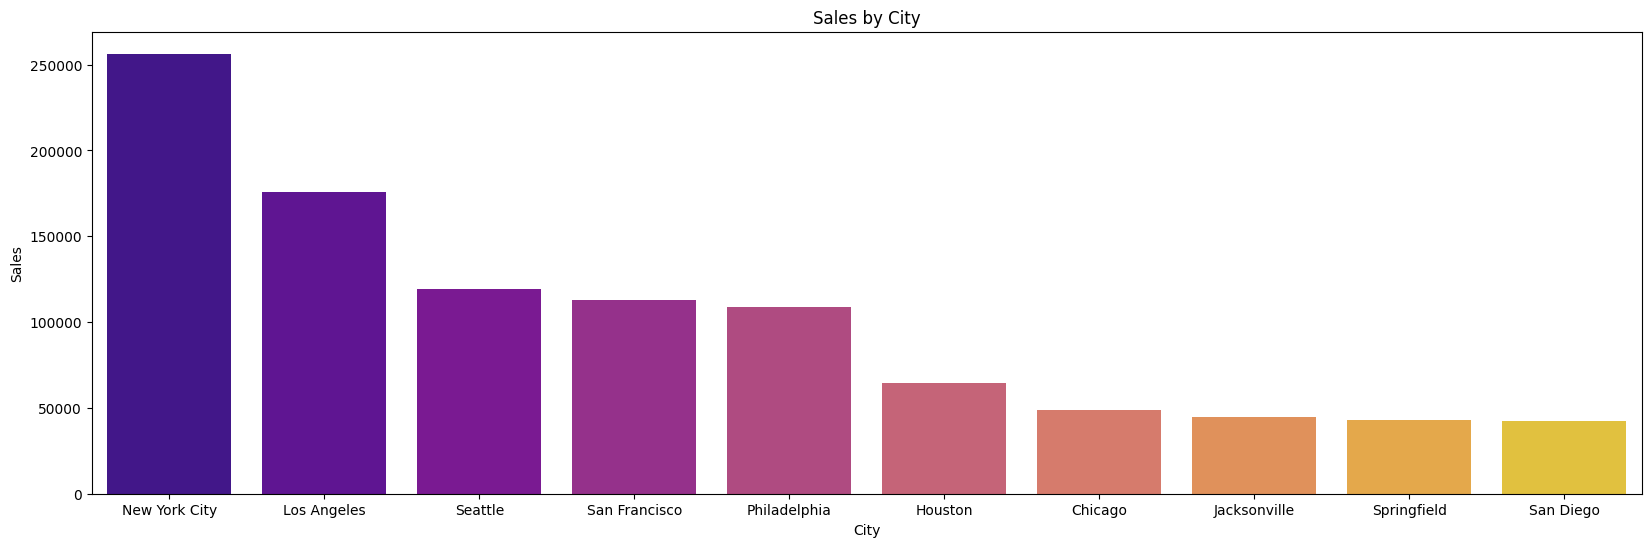

In [33]:
city_sales = city_sales.sort_values(by='Sales', ascending = False)
states_sales = city_sales.head(10)
plt.figure(figsize=(20, 6))
sns.barplot(x='City', y='Sales', data= states_sales, order= states_sales['City'],palette='plasma')
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

# Shiping Mode Analysis

In [34]:
shipmode_sales = data.groupby('Ship_Mode')['Sales'].sum().reset_index()
shipmode_profit = data.groupby('Ship_Mode')['Profit'].sum().reset_index()

# Sales By Ship Mode

<ipython-input-45-793fa1761417>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Ship_Mode', data= shipmode_sales, order= shipmode_sales['Ship_Mode'],palette='viridis')


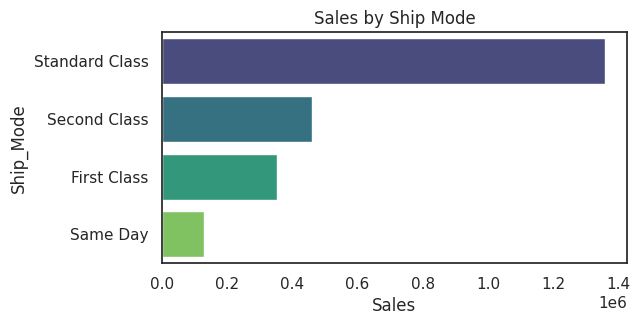

In [45]:
shipmode_sales= shipmode_sales.sort_values(by='Sales', ascending = False)
shipmode_sales = shipmode_sales.head(5)
plt.figure(figsize=(6, 3))
sns.barplot(x='Sales', y='Ship_Mode', data= shipmode_sales, order= shipmode_sales['Ship_Mode'],palette='viridis')
plt.title('Sales by Ship Mode')
plt.xlabel('Sales')
plt.ylabel('Ship_Mode')
plt.show()

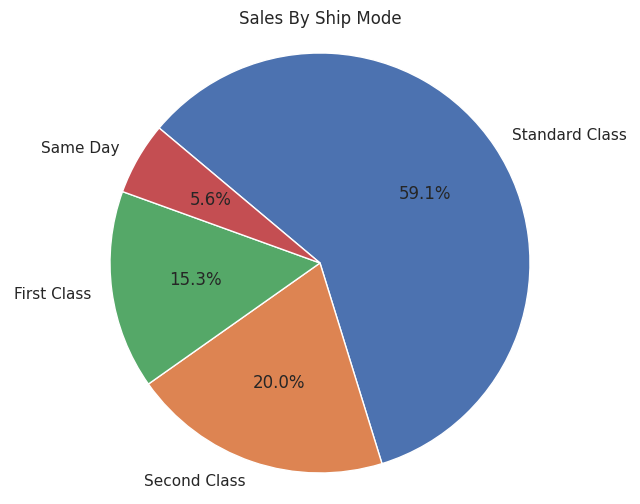

In [52]:

plt.figure(figsize=(8, 6))
plt.pie(shipmode_sales['Sales'], labels=shipmode_sales['Ship_Mode'], autopct='%1.1f%%', startangle=140, counterclock=False)
plt.title('Sales By Ship Mode')
plt.axis('equal')
plt.show()

In [44]:
shipmode_sales

,Ship_Mode,Sales
3,Standard Class,1.357934e+06
2,Second Class,4.591936e+05
0,First Class,3.514284e+05
1,Same Day,1.283631e+05


<ipython-input-50-dbdb9d7d770c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Ship_Mode', data= shipmode_profit, order= shipmode_profit['Ship_Mode'],palette='viridis')


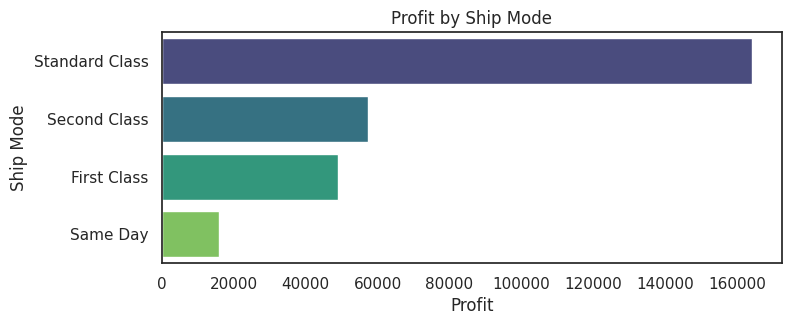

In [50]:
shipmode_profit= shipmode_profit.sort_values(by='Profit', ascending = False)
shipmode_profit = shipmode_profit.head(10)
plt.figure(figsize=(8, 3))
sns.barplot(x='Profit', y='Ship_Mode', data= shipmode_profit, order= shipmode_profit['Ship_Mode'],palette='viridis')
plt.title('Profit by Ship Mode')
plt.xlabel('Profit')
plt.ylabel('Ship Mode')
plt.show()

# Analisis Trend

In [37]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data['Order_Month'] = data['Order_Date'].dt.to_period('M')

monthly_sales = data.groupby('Order_Month')['Sales'].sum().reset_index()
monthly_profit = data.groupby('Order_Month')['Profit'].sum().reset_index()

monthly_sales['Order_Month'] = monthly_sales['Order_Month'].dt.to_timestamp()
monthly_profit['Order_Month'] = monthly_profit['Order_Month'].dt.to_timestamp()



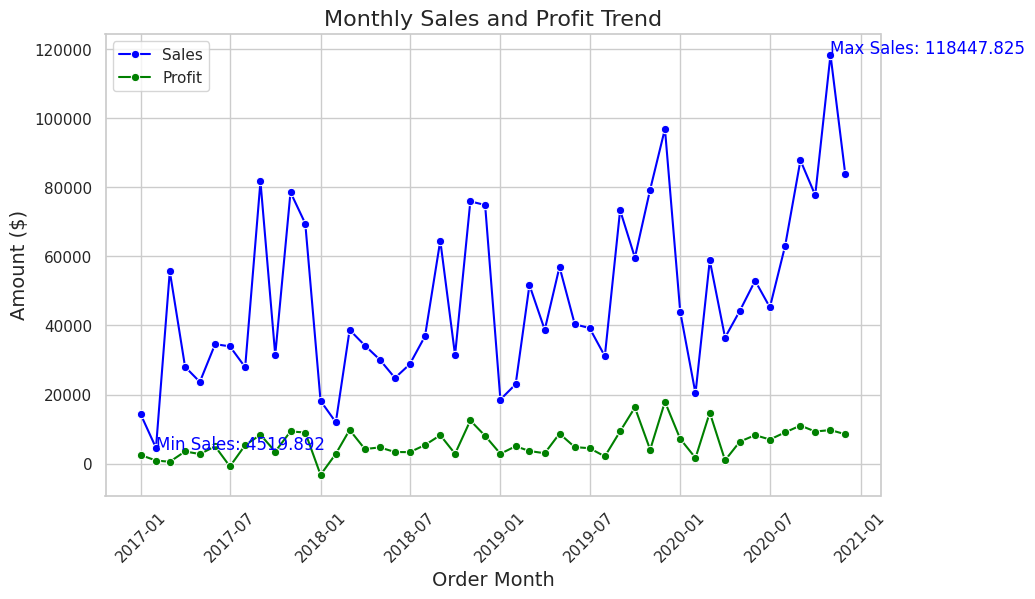

In [53]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order_Month', y='Sales', data=monthly_sales, marker='o', color='blue', label='Sales')
sns.lineplot(x='Order_Month', y='Profit', data=monthly_profit, marker='o', color='green', label='Profit')
max_sales = monthly_sales['Sales'].max()
max_sales_month = monthly_sales.loc[monthly_sales['Sales'] == max_sales, 'Order_Month'].values[0]
min_sales = monthly_sales['Sales'].min()
min_sales_month = monthly_sales.loc[monthly_sales['Sales'] == min_sales, 'Order_Month'].values[0]

plt.annotate(f'Max Sales: {max_sales}', xy=(max_sales_month, max_sales), xytext=(max_sales_month, max_sales + 500),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='blue')
plt.annotate(f'Min Sales: {min_sales}', xy=(min_sales_month, min_sales), xytext=(min_sales_month, min_sales - 500),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='blue')

plt.title('Monthly Sales and Profit Trend', fontsize=16)
plt.xlabel('Order Month', fontsize=14)
plt.ylabel('Amount ($)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Analysis Korelasi

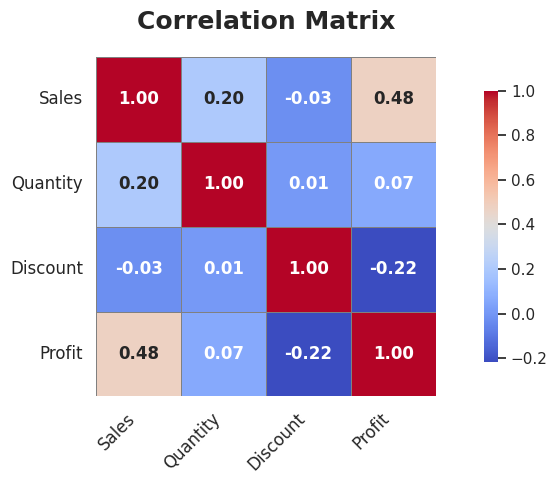

In [39]:
# Menghitung matriks korelasi
correlation_matrix = data[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

# Mengatur gaya seaborn
sns.set(style="white")

# Membuat heatmap
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'shrink': .8},
    linewidths=.5,
    linecolor='grey',
    square=True,
    annot_kws={"size": 12, "weight": 'bold'},
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns
)

# Menambahkan judul dan mengatur font
plt.title('Correlation Matrix', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right', fontweight='medium')
plt.yticks(fontsize=12, rotation=0, fontweight='medium')

# Menampilkan heatmap
plt.tight_layout()
plt.show()